In [107]:
import pandas as pd 
import numpy as np
import matplotlib as mp

In [108]:
import os
print(os.getcwd())

/home/jovyan/Python/pandas


##### Merge 12 months data into single file 

In [109]:
import glob
directory_path='/home/jovyan/Python/data/sales_data'
list_of_csv_files = glob.glob(directory_path + '/*.csv')
list_of_csv_files.sort()

df = pd.concat(map(pd.read_csv, list_of_csv_files,), ignore_index=True)

In [110]:
print(df.shape)
print(df.head(10))

(186850, 6)
  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   
6   176562        USB-C Charging Cable                1      11.95   
7   176563  Bose SoundSport Headphones                1      99.99   
8   176564        USB-C Charging Cable                1      11.95   
9   176565          Macbook Pro Laptop                1       1700   

       Order Date                        Purchase Address  
0  04/19/19 08:46            917 1st St, Dallas, TX 75001  
1             NaN                                     NaN  
2  04/07/19 22:30       682 Chestnut 

## What was the best month for sales ? How much was earned that month ?

In [111]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [112]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [113]:
#remove NA & invalid rows : 
df.dropna(how="any",inplace=True)
df=df[~(df['Order Date'].str.slice(0,2)=='Or')]

In [114]:
#format and create variables : 
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Order Month']=df['Order Date'].dt.month
df['Order Year']=df['Order Date'].dt.year

In [156]:
df['Price Each']=df['Price Each'].astype(float)
df['Quantity Ordered']=df['Quantity Ordered'].astype(int)
df['Order month_year'] = pd.to_datetime(df['Order Date']).dt.to_period('M')


In [157]:
#answer the question best month in sales :
df['Total Price']=df['Quantity Ordered']*df['Price Each']
df['Total Price']
output1=df.groupby(['Order month_year'])['Total Price'].sum()

In [158]:
output1.sort_values(ascending=False)

Order month_year
2019-12    4613443.34
2019-10    3736726.88
2019-04    3390670.24
2019-11    3199603.20
2019-05    3152606.75
2019-03    2807100.38
2019-07    2647775.76
2019-06    2577802.26
2019-08    2244467.88
2019-02    2202022.42
2019-09    2097560.13
2019-01    1813586.44
2020-01       8670.29
Freq: M, Name: Total Price, dtype: float64

## Visualize the result in bar chart 

In [161]:
%matplotlib inline

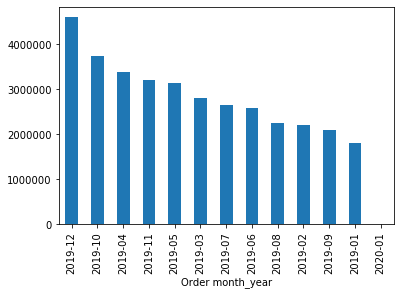

In [164]:
output1.sort_values(ascending=False).plot(kind='bar')

## What city has highest number of sales 

In [165]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Order Year,Total Price,Order month_year
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,23.90,2019-04
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,99.99,2019-04


In [178]:
df['City']=df['Purchase Address'].str.split(",").str.get(-2)
df['State']=df['Purchase Address'].str.split(",").str.get(-1).str.split(" ").str.get(-2)

In [179]:
df['City_State']=df['City']+df['State']

In [182]:
df.groupby('City_State')['Quantity Ordered'].sum()

City_State
 AtlantaGA          16602
 AustinTX           11153
 BostonMA           22528
 DallasTX           16730
 Los AngelesCA      33289
 New York CityNY    27932
 PortlandME          2750
 PortlandOR         11303
 San FranciscoCA    50239
 SeattleWA          16553
Name: Quantity Ordered, dtype: int64

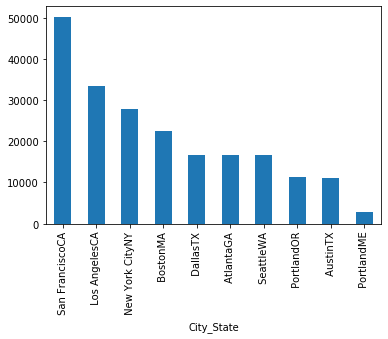

In [183]:
df.groupby('City_State')['Quantity Ordered'].sum().sort_values(ascending=False).plot(kind='bar')

## What time should we display advs to maximize likelihood of customer's buying the product ?

In [184]:
df.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Order Year,Total Price,Order month_year,City,State,City_State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,23.90,2019-04,Dallas,TX,DallasTX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,99.99,2019-04,Boston,MA,BostonMA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,600.00,2019-04,Los Angeles,CA,Los AngelesCA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,11.99,2019-04,Los Angeles,CA,Los AngelesCA


In [199]:
df['Order Hour']=df['Order Date'].dt.round("H").dt.hour

In [203]:
df.loc[:,['Order Hour','Order Date']]

,Order Hour,Order Date
0,9,2019-04-19 08:46:00
2,22,2019-04-07 22:30:00
3,15,2019-04-12 14:38:00
4,15,2019-04-12 14:38:00
5,9,2019-04-30 09:27:00
...,...,...
186845,21,2019-09-17 20:56:00
186846,16,2019-09-01 16:00:00
186847,8,2019-09-23 07:39:00
186848,18,2019-09-19 17:30:00


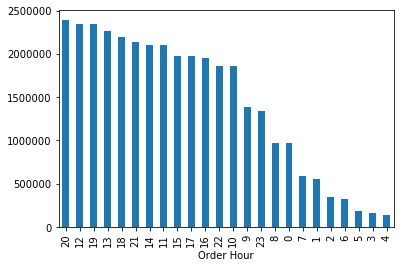

In [200]:
#looking by total spent
df.groupby('Order Hour')['Total Price'].sum().sort_values(ascending=False).plot(kind='bar')

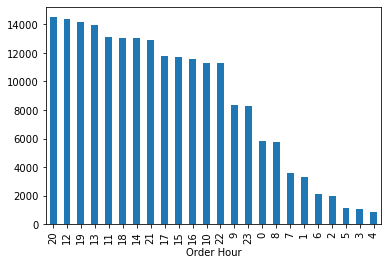

In [201]:
#looking by number of items placed : 
df.groupby('Order Hour')['Quantity Ordered'].sum().sort_values(ascending=False).plot(kind='bar')

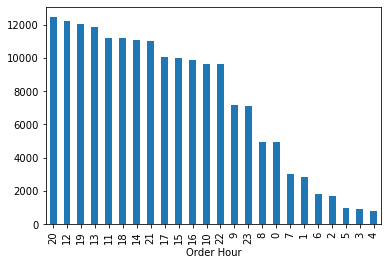

In [202]:
#looking by number of unique order id's
df.groupby('Order Hour')['Order ID'].nunique().sort_values(ascending=False).plot(kind='bar')

## Which products are sold together 

In [204]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Order Year,Total Price,Order month_year,City,State,City_State,Order Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,23.90,2019-04,Dallas,TX,DallasTX,9
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,99.99,2019-04,Boston,MA,BostonMA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,600.00,2019-04,Los Angeles,CA,Los AngelesCA,15
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,11.99,2019-04,Los Angeles,CA,Los AngelesCA,15
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019,11.99,2019-04,Los Angeles,CA,Los AngelesCA,9


In [207]:
df['Order ID'].nunique()

178437

In [ ]:
test=df.groupby(['Order ID'], as_index = False).agg({'Product': ','.join,'Quantity Ordered':sum})

In [221]:
test[test['Order ID']=='176560']

,Order ID,Product,Quantity Ordered
35326,176560,"Google Phone,Wired Headphones",2


In [228]:
#identify number of , in the products : 
test_selected=test[test['Product'].str.contains(",")]



In [229]:
test_selected.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

Product
iPhone,Lightning Charging Cable         1822
Google Phone,USB-C Charging Cable       1785
iPhone,Wired Headphones                  752
Vareebadd Phone,USB-C Charging Cable     648
Google Phone,Wired Headphones            637
                                        ... 
LG Dryer,Google Phone                      2
LG Dryer,Flatscreen TV                     2
LG Dryer,27in FHD Monitor                  2
LG Dryer,27in 4K Gaming Monitor            2
iPhone,iPhone                              2
Name: Quantity Ordered, Length: 366, dtype: int64

## What products sold the most , why it sold the most ?

In [230]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Order Year,Total Price,Order month_year,City,State,City_State,Order Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,23.90,2019-04,Dallas,TX,DallasTX,9
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,99.99,2019-04,Boston,MA,BostonMA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,600.00,2019-04,Los Angeles,CA,Los AngelesCA,15
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,11.99,2019-04,Los Angeles,CA,Los AngelesCA,15
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019,11.99,2019-04,Los Angeles,CA,Los AngelesCA,9


In [233]:
df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64